In [17]:
#|default_exp app

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pwd

/content


In [3]:
import os
os.chdir('/content/drive/MyDrive/fastai') # change working directory
!pwd

/content/drive/MyDrive/fastai


In [4]:
!pip install --user -qq torch==1.9.0 torchvision==0.10.0 torchaudio==0.9.0 torchtext==0.10.0
!pip install --user -qq fastai

In [5]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 27.0 MB/s 
     |████████████████████████████████| 84 kB 3.0 MB/s 
     |████████████████████████████████| 57 kB 5.1 MB/s 
     |████████████████████████████████| 141 kB 61.6 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 275 kB 54.9 MB/s 
     |████████████████████████████████| 54 kB 3.2 MB/s 
     |████████████████████████████████| 2.3 MB 63.8 MB/s 
     |████████████████████████████████| 212 kB 47.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 8.3 MB/s 
     |████████████████████████████████| 68 kB 6.2 MB/s 
     |████████████████████████████████| 43 kB 2.1 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 4.1 MB 48.4

In [5]:
!pip install timm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

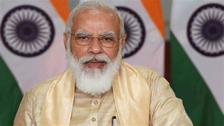

In [7]:
img = PILImage.create('narendra modi')
img.thumbnail((224,224))
img

In [8]:
#|export
learn = load_learner('export.pkl')

In [9]:
learn.predict(img)

/root/.local/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


('narendra modi',
 tensor(4),
 tensor([6.2628e-12, 4.0092e-09, 2.7112e-10, 9.6719e-08, 1.0000e+00, 1.2365e-11,
         2.0535e-11]))

In [10]:
#|export
categories = learn.dls.vocab

def classify_image(img):
  pred,idx,probs = learn.predict(img)
  return dict(zip(categories,map(float,probs)))

In [11]:
classify_image(img=img)

{'george bush': 6.262795403805255e-12,
 'jacinda ardern': 4.009158338647012e-09,
 'joe biden': 2.7112309619603536e-10,
 'leaders': 9.671945377931479e-08,
 'narendra modi': 0.9999998807907104,
 'olaf scholz': 1.2364967556799389e-11,
 'vladimir putin': 2.0534563632823577e-11}

In [12]:
#|export
image = gr.inputs.Image(shape=(192,192))
labels = gr.outputs.Label()
examples = ['olaf1.jpg','olaf-young.jpg','narendra modi','jacinda1.jpg']

/usr/local/lib/python3.7/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

In [13]:
#|export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=labels, examples=examples)
intf.launch(inline=False)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://48832.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fdffb3e6a10>,
 'http://127.0.0.1:7860/',
 'https://48832.gradio.app')

In [14]:
m = learn.model
m

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [18]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

AttributeError: ignored

## export

In [15]:
!pip install nbdev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
from nbdev.export import notebook2script

ImportError: ignored